In [16]:
# Imports
import os
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paths
BASE = r"C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking"
DATA_YAML = os.path.join(BASE, "data", "data.yaml")

# Path to your trained YOLOv8 model
MODEL_PATH = os.path.join(BASE, "runs", "yolov8_finetune", "weights", "best.pt")

# Device (0 = first GPU, 'cpu' if no GPU)
DEVICE = 0

# Load model
model = YOLO(MODEL_PATH)
print("✅ Model loaded:", MODEL_PATH)


✅ Model loaded: C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\runs\yolov8_finetune\weights\best.pt


In [15]:
# Run validation on the dataset
results = model.val(
    data=DATA_YAML,
    batch=8,        # change according to your GPU
    device=DEVICE,
    imgsz=640
)

print("✅ Validation complete!")


Ultralytics 8.3.208  Python-3.10.18 torch-2.5.1 CUDA:0 (NVIDIA GeForce MX570, 2048MiB)
val: Fast image access  (ping: 0.30.1 ms, read: 704.5192.7 MB/s, size: 2578.0 KB)
val: Scanning C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\labels\val.cache... 17 images, 0 backgrounds, 9 corrupt: 100% ━━━━━━━━━━━━ 17/17  0.0sval: Fast image access  (ping: 0.30.1 ms, read: 704.5192.7 MB/s, size: 2578.0 KB)
val: Scanning C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\labels\val.cache... 17 images, 0 backgrounds, 9 corrupt: 100% ━━━━━━━━━━━━ 17/17 8.5Kit/s 0.0s
val: C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-rdne-stock-project-4921398.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
val: C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-sairam-rasa-3419331.jpg: ignoring cor

In [8]:
# Summary metrics (precision, recall, mAP50, mAP50-95)
results.summary()

# Get mean metrics
mp, mr, map50, map50_95 = results.box.mean_results()
print(f"Precision: {mp:.3f}, Recall: {mr:.3f}, mAP@0.5: {map50:.3f}, mAP@0.5:0.95: {map50_95:.3f}")


Precision: 0.571, Recall: 0.691, mAP@0.5: 0.654, mAP@0.5:0.95: 0.488


In [14]:
# Confusion matrix
cm = results.confusion_matrix.matrix if hasattr(results, "confusion_matrix") else None  # returns a matrix for all classes

if cm is not None:
    class_names = results.names  # {0: 'person', 1: 'bicycle', ...}
    
    plt.figure(figsize=(12,10))
    # Use fmt=".2f" for floats, not "d"
    sns.heatmap(cm, xticklabels=list(class_names.values()), yticklabels=list(class_names.values()),
                annot=True, fmt=".2f", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


<Figure size 1200x1000 with 2 Axes>

✅ Loaded trained model from: C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\runs\yolov8_finetune_v2\weights\best.pt
🔹 Random test image selected: C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-sairam-rasa-3419331.jpg


image 1/1 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-sairam-rasa-3419331.jpg: 384x640 1 person, 1 bottle, 178.4ms
Speed: 5.9ms preprocess, 178.4ms inference, 448.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\outputs\test_image_pred
image 1/1 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-sairam-rasa-3419331.jpg: 384x640 1 person, 1 bottle, 178.4ms
Speed: 5.9ms preprocess, 178.4ms inference, 448.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\ksush\Downloads\Summer

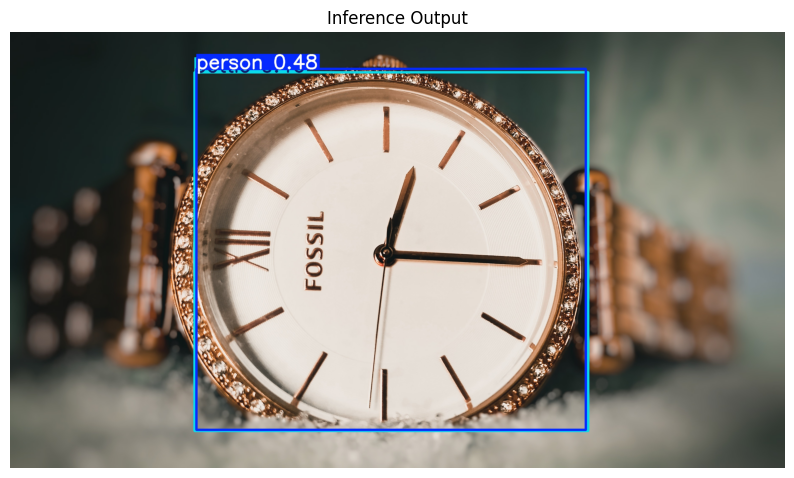


image 1/17 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-rdne-stock-project-4921398.jpg: 640x448 1 person, 1 bottle, 195.0ms
image 1/17 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-rdne-stock-project-4921398.jpg: 640x448 1 person, 1 bottle, 195.0ms
image 2/17 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-rolando-brando-2703907.jpg: 640x448 1 bottle, 113.0ms
image 2/17 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-rolando-brando-2703907.jpg: 640x448 1 bottle, 113.0ms
image 3/17 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-roman-odintsov-4870844.jpg: 640x448 1 bottle, 35.2ms
image 3/17 C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking\data\images\val\pexels-roman-odintsov-4870844.jpg: 640x448 1 bottle, 35

In [7]:
# ----------------------------------------------------
# 03_YOLO_model_inference.ipynb
# ----------------------------------------------------

# Imports
import os
from ultralytics import YOLO
import cv2
import random
from matplotlib import pyplot as plt

# -----------------------------
# Paths
# -----------------------------
BASE = r"C:\Users\ksush\Downloads\Summer_intern\Real_time_object_detection_tracking"

# Trained YOLOv8 model weights
MODEL_PATH = os.path.join(
    BASE,
    "runs",
    "yolov8_finetune_v2",
    "weights",
    "best.pt"
)

# Validation images folder
VAL_DIR = os.path.join(BASE, "data", "images", "val")

# Output folder for inference results
OUTPUT_DIR = os.path.join(BASE, "outputs")
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# Load trained YOLOv8 model
# -----------------------------
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Trained model not found at {MODEL_PATH}")

model = YOLO(MODEL_PATH)
print("✅ Loaded trained model from:", MODEL_PATH)

# -----------------------------
# Pick a random validation image
# -----------------------------
val_images = [os.path.join(VAL_DIR, f) for f in os.listdir(VAL_DIR) if f.endswith((".jpg", ".png", ".jpeg"))]
if not val_images:
    raise FileNotFoundError(f"No images found in validation folder: {VAL_DIR}")

TEST_IMAGE = random.choice(val_images)
print("🔹 Random test image selected:", TEST_IMAGE)

# -----------------------------
# Inference on single image
# -----------------------------
results = model.predict(
    source=TEST_IMAGE,
    conf=0.4,          # confidence threshold
    save=True,         # saves image with bounding boxes
    project=OUTPUT_DIR,
    name="test_image_pred"
)

# Display the output image
img_out_path = os.path.join(OUTPUT_DIR, "test_image_pred", os.path.basename(TEST_IMAGE))
if os.path.exists(img_out_path):
    img = cv2.imread(img_out_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Inference Output")
    plt.show()
else:
    print("⚠️ Output image not found:", img_out_path)

# -----------------------------
# Batch inference on validation folder
# -----------------------------
results = model.predict(
    source=VAL_DIR,
    conf=0.4,
    save=True,
    project=OUTPUT_DIR,
    name="batch_predictions"
)

print("✅ Batch predictions saved at:", os.path.join(OUTPUT_DIR, "batch_predictions"))
